In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import *
from tkinter import ttk
from tkinter import messagebox as ms
from PIL import ImageTk, Image
import librosa as lr

In [2]:
df = pd.read_csv('Audio_features01.csv')
df = pd.DataFrame(df)
df.Gender = df.Gender.map({'m':1,'f':0})
df.head()

,ID,max_pitch,avg_pitch,var_pitch,harmonic,harmonic_var,percussive,percussive_var,Chroma_cens,Chroma_cens_var,...,tonnetz_var,poly_features_mean,poly_features_var,spec_bw_mean,spec_bw_var,rmse_mean,rmse_var,melspec_mean,melspec_var,Gender
0,id10270,3997.841064,42.346413,96089.29688,-1.560000e-06,0.000202,-0.000006,0.000108,0.242919,0.024324,...,0.005452,0.213742,0.090299,1832.898065,66277.90445,0.016548,0.000126,0.087206,0.474396,0
1,id10270,3990.921631,24.817791,54618.11719,-1.270000e-07,0.000372,-0.000011,0.000095,0.230322,0.030285,...,0.005598,0.233429,0.088407,1788.479207,79085.42978,0.021079,0.000134,0.131519,1.215273,0
2,id10270,3998.479736,42.045082,96594.42188,2.510000e-07,0.000216,-0.000007,0.000082,0.236287,0.027502,...,0.004188,0.227063,0.076282,1769.345148,92095.92280,0.017476,0.000081,0.085588,0.315356,0
3,id10270,3999.575439,44.815517,102965.95310,2.490000e-06,0.000615,0.000003,0.000221,0.253536,0.019053,...,0.004053,0.290899,0.195379,1841.708591,83468.48921,0.025059,0.000499,0.251364,7.590028,0
4,id10270,3996.976074,33.027214,70115.64063,-4.280000e-07,0.000500,-0.000011,0.000292,0.247803,0.021927,...,0.004426,0.337164,0.207456,1674.683319,79977.60057,0.027922,0.000351,0.253995,7.818778,0


In [3]:
df.var()

max_pitch             3.093775e+03
avg_pitch             1.399577e+02
var_pitch             9.343427e+08
harmonic              5.505517e-07
harmonic_var          7.224100e-06
percussive            2.550444e-08
percussive_var        3.898231e-06
Chroma_cens           1.497719e-04
Chroma_cens_var       3.622834e-05
chroma_stft_mean      2.100154e-03
chroma_stft_var       3.589528e-05
chroma_cqt_mean       1.887063e-03
chroma_cqt_var        8.239181e-05
Mfccs                 2.546947e+01
Mfccs_var             8.427385e+06
mfcc_delta_mean       2.703507e-04
mfcc_delta_var        2.264692e+00
Contrast              1.887962e+00
Contrast_var          9.869399e+02
Rolloff               4.231160e+05
Rolloff_var           6.478189e+11
Zrate                 4.237331e-04
Zrate_var             2.221433e-06
Cent                  1.196876e+05
Cent_var              1.536434e+11
tonnetz_mean          3.852231e-05
tonnetz_var           1.611023e-06
poly_features_mean    9.943555e-02
poly_features_var   

In [4]:
from sklearn.preprocessing import LabelEncoder
pred = df.drop(['ID'],axis =1)
col = list(pred.columns)
enc = LabelEncoder()
target = enc.fit_transform(df.ID)
pred.head()
#target = pd.DataFrame(target,columns=['target'])
#target.head()
#targets = pd.DataFrame(target)
#targets.head()

,max_pitch,avg_pitch,var_pitch,harmonic,harmonic_var,percussive,percussive_var,Chroma_cens,Chroma_cens_var,chroma_stft_mean,...,tonnetz_var,poly_features_mean,poly_features_var,spec_bw_mean,spec_bw_var,rmse_mean,rmse_var,melspec_mean,melspec_var,Gender
0,3997.841064,42.346413,96089.29688,-1.560000e-06,0.000202,-0.000006,0.000108,0.242919,0.024324,0.339705,...,0.005452,0.213742,0.090299,1832.898065,66277.90445,0.016548,0.000126,0.087206,0.474396,0
1,3990.921631,24.817791,54618.11719,-1.270000e-07,0.000372,-0.000011,0.000095,0.230322,0.030285,0.285754,...,0.005598,0.233429,0.088407,1788.479207,79085.42978,0.021079,0.000134,0.131519,1.215273,0
2,3998.479736,42.045082,96594.42188,2.510000e-07,0.000216,-0.000007,0.000082,0.236287,0.027502,0.358004,...,0.004188,0.227063,0.076282,1769.345148,92095.92280,0.017476,0.000081,0.085588,0.315356,0
3,3999.575439,44.815517,102965.95310,2.490000e-06,0.000615,0.000003,0.000221,0.253536,0.019053,0.387897,...,0.004053,0.290899,0.195379,1841.708591,83468.48921,0.025059,0.000499,0.251364,7.590028,0
4,3996.976074,33.027214,70115.64063,-4.280000e-07,0.000500,-0.000011,0.000292,0.247803,0.021927,0.347066,...,0.004426,0.337164,0.207456,1674.683319,79977.60057,0.027922,0.000351,0.253995,7.818778,0


# Normalization of Data

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(pred))
df_scaled.columns = col
df_scaled.head()
#df_scaled.var()

,max_pitch,avg_pitch,var_pitch,harmonic,harmonic_var,percussive,percussive_var,Chroma_cens,Chroma_cens_var,chroma_stft_mean,...,tonnetz_var,poly_features_mean,poly_features_var,spec_bw_mean,spec_bw_var,rmse_mean,rmse_var,melspec_mean,melspec_var,Gender
0,0.134618,1.497048,1.427502,0.013215,-0.367059,-0.025919,-0.609430,-0.435296,0.459593,0.055698,...,0.335613,-0.757561,-0.535312,1.564331,-1.714809,-0.879058,-0.618564,-0.510132,-0.115543,-1.536454
1,0.010203,0.015233,0.070633,0.015147,-0.303830,-0.055289,-0.616144,-1.464748,1.450149,-1.121674,...,0.450154,-0.695120,-0.537370,1.313576,-1.503763,-0.712445,-0.612577,-0.475628,-0.114983,-1.536454
2,0.146101,1.471575,1.444029,0.015656,-0.361652,-0.028862,-0.622881,-0.977221,0.987616,0.455043,...,-0.660327,-0.715312,-0.550556,1.205559,-1.289373,-0.844925,-0.651262,-0.511391,-0.115663,-1.536454
3,0.165802,1.705779,1.652495,0.018674,-0.213264,0.034075,-0.552192,0.432367,-0.416241,1.107418,...,-0.767128,-0.512851,-0.421024,1.614069,-1.431538,-0.566113,-0.345614,-0.382313,-0.110173,-1.536454
4,0.119065,0.709232,0.577687,0.014741,-0.256073,-0.054663,-0.516189,-0.036201,0.061393,0.216342,...,-0.472993,-0.366118,-0.407890,0.671169,-1.489062,-0.460849,-0.453621,-0.380264,-0.110000,-1.536454


In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df_scaled,target,test_size = 0.2,stratify = target)

# Decision Tree Classifier

In [19]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier()
param_grid = {'criterion': ['gini','entropy']}
dtree_cv = GridSearchCV(model,param_grid,cv= 10)
dtree_cv.fit(xtrain,ytrain)
dtree_ypred = dtree_cv.predict(xtest)

In [20]:
dtree_cv.best_params_

{'criterion': 'entropy'}

# Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest,dtree_ypred))

             precision    recall  f1-score   support

          0       0.66      0.66      0.66        32
          1       0.18      0.13      0.15        15
          2       0.40      0.40      0.40        10
          3       0.31      0.31      0.31        48
          4       0.20      0.09      0.13        11
          5       0.50      0.53      0.52        15
          6       0.39      0.43      0.41        37
          7       0.38      0.23      0.29        13
          8       0.64      0.43      0.52        37
          9       0.50      0.46      0.48        13
         10       0.73      0.62      0.67        13
         11       0.42      0.47      0.44        17
         12       0.39      0.41      0.40        17
         13       0.61      0.66      0.63        47
         14       1.00      0.72      0.84        18
         15       0.65      0.68      0.67        19
         16       0.67      0.73      0.70        30
         17       0.30      0.33      0.32   

# AUC Decision Tree

In [316]:
dtree_ypred = dtree_cv.predict(xtest)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, dtree_ypred ,pos_label = 38)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8269230769230769

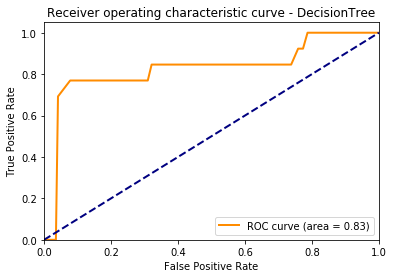

In [317]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve - DecisionTree')
plt.legend(loc="lower right")
plt.show()

# K Nearest Neighbour Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv= 10)
knn_cv.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
knn_cv.score(xtest,ytest)

0.7261538461538461

In [12]:
knn_cv.best_params_

{'n_neighbors': 1}

In [13]:
knn_cv.best_score_

0.7388404309902514

In [14]:
knn_ypred = knn_cv.predict(xtest)

In [15]:
print(classification_report(ytest,knn_ypred))

             precision    recall  f1-score   support

          0       0.81      0.81      0.81        32
          1       0.67      0.40      0.50        15
          2       0.67      0.60      0.63        10
          3       0.62      0.67      0.64        48
          4       0.42      0.45      0.43        11
          5       0.77      0.67      0.71        15
          6       0.74      0.68      0.70        37
          7       0.50      0.54      0.52        13
          8       0.77      0.54      0.63        37
          9       0.64      0.69      0.67        13
         10       0.79      0.85      0.81        13
         11       0.80      0.94      0.86        17
         12       0.76      0.76      0.76        17
         13       0.76      0.89      0.82        47
         14       0.84      0.89      0.86        18
         15       0.79      0.79      0.79        19
         16       0.90      0.87      0.88        30
         17       0.56      0.56      0.56   

# AUC KNN Classifier

In [309]:
knn_ypred = knn_cv.predict(xtest)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, knn_ypred ,pos_label = 38)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.7882616344154805

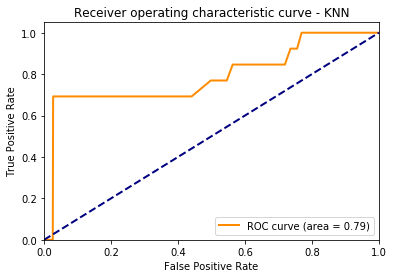

In [310]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve - KNN')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 16)
param = {'n_estimators':np.arange(1,40)}
rmodel_cv = GridSearchCV(model1,param,cv=10)
rmodel_cv.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
rmodel_cv.best_params_

{'n_estimators': 39}

In [24]:
rmodel_cv.best_score_

0.7378142637249872

In [25]:
rmodel_cv.score(xtest,ytest)

0.7528205128205128

In [26]:
y_pred = rmodel_cv.predict(xtest)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

             precision    recall  f1-score   support

          0       0.70      0.81      0.75        32
          1       0.71      0.33      0.45        15
          2       0.50      0.50      0.50        10
          3       0.56      0.77      0.65        48
          4       1.00      0.45      0.62        11
          5       0.92      0.73      0.81        15
          6       0.66      0.73      0.69        37
          7       0.80      0.31      0.44        13
          8       0.77      0.81      0.79        37
          9       0.82      0.69      0.75        13
         10       0.86      0.92      0.89        13
         11       0.70      0.82      0.76        17
         12       0.61      0.82      0.70        17
         13       0.78      0.96      0.86        47
         14       0.88      0.83      0.86        18
         15       0.94      0.79      0.86        19
         16       0.87      0.87      0.87        30
         17       1.00      0.22      0.36   

In [295]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ytest,y_pred)
cm

array([[26,  0,  0, ...,  2,  0,  0],
       [ 0,  5,  0, ...,  0,  0,  1],
       [ 0,  0,  4, ...,  0,  0,  1],
       ...,
       [ 3,  0,  0, ..., 20,  0,  0],
       [ 1,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 19]], dtype=int64)

Text(123,0.5,'truth')

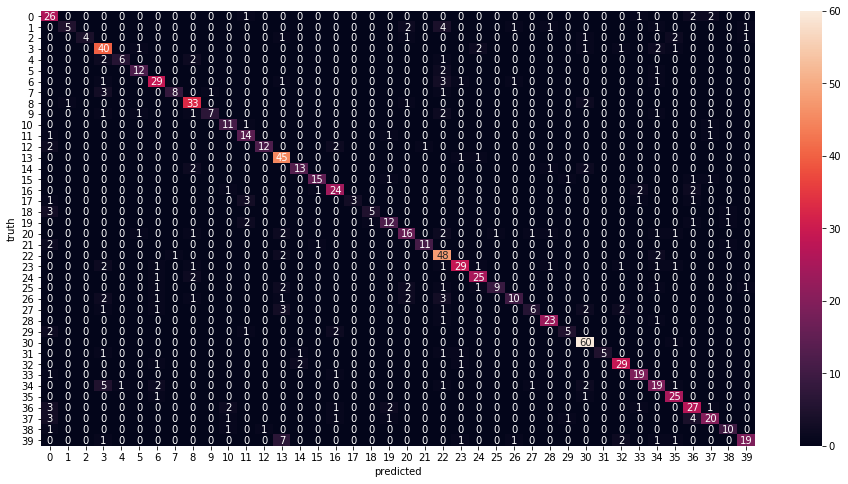

In [296]:
plt.figure(figsize = (16,8))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# AUC Random Forest

In [314]:
from sklearn import metrics
#y = np.array([1, 1, 2, 2])
#pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred ,pos_label = 35)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8590990779809344

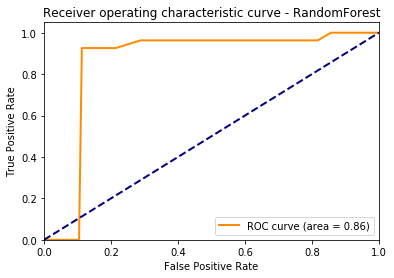

In [315]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve - RandomForest')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes 

In [30]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(xtrain, ytrain) 

GaussianNB(priors=None)

In [31]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(gnb,xtrain,ytrain,cv=10)
cv

array([0.38271605, 0.34243176, 0.38131313, 0.35114504, 0.35641026,
       0.3685567 , 0.39378238, 0.33942559, 0.38157895, 0.36631016])

In [32]:
gnb_ypred = gnb.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,dtree_ypred))

             precision    recall  f1-score   support

          0       0.66      0.66      0.66        32
          1       0.18      0.13      0.15        15
          2       0.40      0.40      0.40        10
          3       0.31      0.31      0.31        48
          4       0.20      0.09      0.13        11
          5       0.50      0.53      0.52        15
          6       0.39      0.43      0.41        37
          7       0.38      0.23      0.29        13
          8       0.64      0.43      0.52        37
          9       0.50      0.46      0.48        13
         10       0.73      0.62      0.67        13
         11       0.42      0.47      0.44        17
         12       0.39      0.41      0.40        17
         13       0.61      0.66      0.63        47
         14       1.00      0.72      0.84        18
         15       0.65      0.68      0.67        19
         16       0.67      0.73      0.70        30
         17       0.30      0.33      0.32   

In [312]:
nb_ypred = gnb.predict(xtest)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, nb_ypred ,pos_label = 39)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6348034484977161

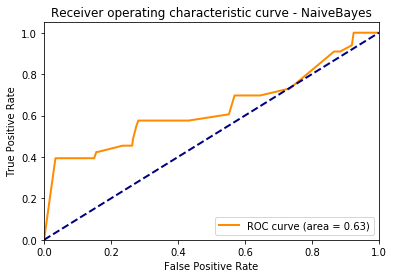

In [313]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve - NaiveBayes')
plt.legend(loc="lower right")
plt.show()

In [65]:
result = pd.read_csv('metavox1.csv')
rs = pd.DataFrame(result)
rs.Gender = rs.Gender.map({'M':1,'F':0})
rs.head()

,ID,class,targetname,Gender
0,id10270,0,Eartha_Kitest,0
1,id10271,1,Ed_Westwick,1
2,id10272,2,Eddie_Griffin,1
3,id10273,3,Eddie_Izzar,1
4,id10274,4,Eddie_Kaye_Thomas,1


In [149]:
dtyr = rs[rs.targetname =='Eddie_Griffin']
dtyr

,ID,class,targetname,Gender
2,id10272,2,Eddie_Griffin,1


# GUI Speaker Identification

In [243]:
class design:
    def __init__(self,master):
        self.master=master
        self.filedir = StringVar()
        self.speakername = str()
        self.imgframe = None
        self.downframe = None
    
    def plot_wav(self):
        import matplotlib.pyplot as plt
        from scipy.io import wavfile as wav
        self.rate, self.data = wav.read(self.filedir)
        %matplotlib inline
        plt.clf()
        plt.figure(figsize = (7,4))
        plt.plot(self.data)
        plt.xlabel('No of Frames')
        plt.ylabel('Sampling Rate')
        plt.title('Speaking Rate')
        fig1 = plt.gcf()
        fig1.savefig('audioplot')
        self.imgframe = Frame(self.master,bg='white')
        self.imgframe.pack()
        self.pltimg = ImageTk.PhotoImage(Image.open('audioplot.png'))
        self.imgpanel = Button(self.imgframe,image =self.pltimg)
        self.imgpanel.pack(side = "bottom",fill="both",expand="yes")
        self.downframe = Frame(self.master,padx =5,pady = 10,bg='white')
        self.downframe.pack()
        self.predbtn = Button(self.downframe,text='Predict Speaker',padx=10,bd=2,fg=('black'),font=('',12),bg="#1B9CFC",command=self.pred_speaker).grid(row=0,column=0)
    
    def pred_speaker(self):
        audio,sfreq = lr.load(self.filedir)
        S = np.abs(lr.stft(audio))
        pitches,magnitudes = lr.core.piptrack(y = audio ,sr = sfreq)
        #min_pitch = np.min(pitches)
        max_pitch = np.max(pitches)
        avg_pitch = np.mean(pitches)
        var_pitch = np.var(pitches)
        y_harmonic, y_percussive = lr.effects.hpss(audio)
        #print(np.mean(y_harmonic),np.mean(y_percussive))
        harmonic = np.mean(y_harmonic)
        harmonic_var = np.var(y_harmonic)
        percussive = np.mean(y_percussive)
        percussive_var = np.var(y_percussive)
        chroma=lr.feature.chroma_cens(y=y_harmonic, sr=sfreq)
        #print(np.mean(chroma))
        Chroma_cens = np.mean(chroma)
        Chroma_cens_var = np.var(chroma)

        chroma_stft =lr.feature.chroma_stft(y=y_harmonic, sr=sfreq)
        chroma_stft_mean = np.mean(chroma_stft)
        chroma_stft_var = np.var(chroma_stft)

        chroma_cqt =lr.feature.chroma_cqt(y=y_harmonic, sr=sfreq)
        chroma_cqt_mean = np.mean(chroma_cqt)
        chroma_cqt_var = np.var(chroma_cqt)

        mfccs = lr.feature.mfcc(y=y_harmonic, sr=sfreq)
        #print(np.mean(mfccs))
        Mfccs = np.mean(mfccs)
        Mfccs_var = np.var(mfccs)
        delta = lr.feature.delta(mfccs)
        mfcc_delta_mean = np.mean(delta)
        mfcc_delta_var = np.var(delta)
        contrast=lr.feature.spectral_contrast(y=y_harmonic,sr=sfreq)
        #print(np.mean(contrast))
        Contrast = np.mean(contrast)
        Contrast_var = np.var(contrast)

        rolloff = lr.feature.spectral_rolloff(y=audio, sr=sfreq)
        #print(np.mean(rolloff))
        Rolloff = np.mean(rolloff)
        Rolloff_var = np.var(rolloff)

        zrate=lr.feature.zero_crossing_rate(y_harmonic)
        #print(np.mean(zrate) )
        Zrate = np.mean(zrate)
        Zrate_var = np.var(zrate)

        cent = lr.feature.spectral_centroid(y=audio, sr=sfreq)
        Cent = np.mean(cent)
        Cent_var = np.var(cent)

        tonnetz = lr.feature.tonnetz(y=audio, sr=sfreq)
        tonnetz_mean = np.mean(tonnetz)
        tonnetz_var = np.var(tonnetz)

        poly_features = lr.feature.poly_features(S=S, sr=sfreq)
        poly_features_mean = np.mean(poly_features)
        poly_features_var = np.var(poly_features)

        spec_bw = lr.feature.spectral_bandwidth(y=audio, sr=sfreq)
        spec_bw_mean = np.mean(spec_bw)
        spec_bw_var = np.var(spec_bw)

        rmse = lr.feature.rmse(y=audio)
        rmse_mean = np.mean(rmse)
        rmse_var = np.var(rmse)

        melspectrogram = lr.feature.melspectrogram(y=audio, sr=sfreq)
        melspec_mean = np.mean(melspectrogram)
        melspec_var = np.var(melspectrogram)
        
        sid = d.filedir[60:67]
        dtyr = rs[rs.ID == sid]
        pred1 = pd.DataFrame(pred)
        pred1.loc[len(pred)] = list([max_pitch,avg_pitch,var_pitch,harmonic,harmonic_var,percussive,percussive_var,Chroma_cens,Chroma_cens_var,chroma_stft_mean,chroma_stft_var,chroma_cqt_mean,chroma_cqt_var,Mfccs,Mfccs_var,mfcc_delta_mean,mfcc_delta_var,Contrast,Contrast_var,Rolloff,Rolloff_var,Zrate,Zrate_var,Cent,Cent_var,tonnetz_mean,tonnetz_var,poly_features_mean,poly_features_var,spec_bw_mean,spec_bw_var,rmse_mean,rmse_var,melspec_mean,melspec_var,dtyr.Gender])
        df_scaled1 = pd.DataFrame(ss.fit_transform(pred1))
        df_scaled1.columns = col
        
        pred_val = rmodel_cv.predict([df_scaled1.loc[len(pred)]])
        sname = rs[rs['class'] == pred_val[0]]
        slist = list(sname.iloc[:,2])
        self.speakername = str(slist[0])
        Label(self.downframe,text= ""+self.speakername+" is the Speaker!",font=('',14),padx=6,pady=8,bg='white').grid(row=1,column=0)
    
    def browse_button(self):
        # Allow user to select a directory and store it in global var
        # called folder_path
        #global filename
        if(self.imgframe is not None):
            self.imgframe.pack_forget()
        if(self.downframe is not None):
            self.downframe.pack_forget()
        file = filedialog.askopenfilename(initialdir = "C:/Users/SRIVIGNESH/ML-Exercises/vox1_test_wav/wav_modified",title = "Select file")
        #filename.set(file)
        self.filedir = file
        #print(self.filedir)
        self.plot_wav()
        
    def main_ui(self):
        self.mainframe = Frame(self.master,padx =5,pady = 10,bg='white')
        self.mainframe.pack()
        Label(self.mainframe,text="Select an audio file to Identify the Speaker",font=('',14),padx=6,pady=8,bg='white').grid(row=0,column=0)
        Button(self.mainframe, text="Upload a file",bg=("#3B3B98"),fg=('#58B19F'),font=('',12),command=self.browse_button,bd = 1).grid(row=1)

In [54]:
def Main_Ui():
    root = Tk()
    root.title("Speaker Identification")
    root.geometry('1366x760')
    root.configure(background='white')
    fd_lbl=Label(root,text="SPEAKER IDENTIFICATION MODEL",font = ('',35),pady = 7,bg='#ff6348')
    fd_lbl.pack(fill=X)
    d=design(root)
    d.main_ui()
    root.mainloop()

<Figure size 432x288 with 0 Axes>

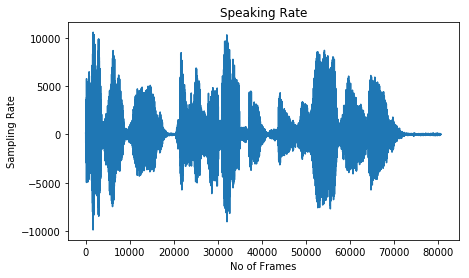

In [318]:
Main_Ui()

Text(0.5,1,'Standardized Data (harmonic)')

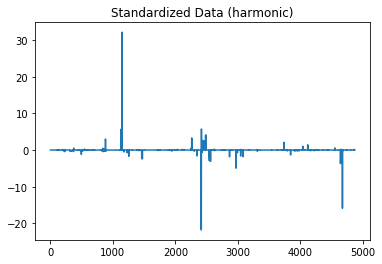

In [276]:
plt.plot(df_scaled['harmonic'])
plt.title('Standardized Data (harmonic)')

Text(0.5,1,'Actual Data (harmonic)')

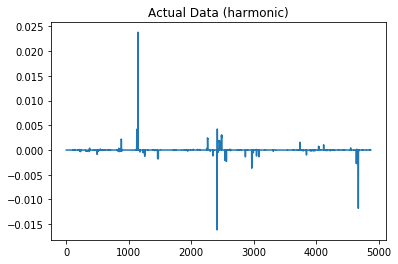

In [277]:
plt.plot(df['harmonic'])
plt.title('Actual Data (harmonic)')

In [288]:
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

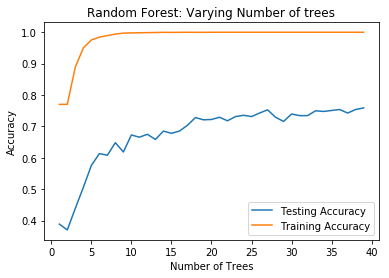

In [289]:
for k in neighbors:
    model1 = RandomForestClassifier(n_estimators = k)
    model1.fit(xtrain, ytrain)
    
    train_accuracy[k-1] = model1.score(xtrain, ytrain)

    test_accuracy[k-1] = model1.score(xtest, ytest)
    
plt.title('Random Forest: Varying Number of trees')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()